# Forward and Backward Propagating Pulses

The wave equation for the voltage on a lossless transmission line that we discussed in class is

$$\frac{\partial^2 v}{\partial z^2} = \frac{1}{u^2}\frac{\partial^2 v}{\partial t^2}.$$

It has a general solution of the form

$$v(z,t) = v^+(z - ut) + v^-(z + ut),$$

where $z$ is position along the transmission line, $t$ is time, and $u$ is the phase velocity. $v^+$ and $v^-$ represent forward and reverse propagating waves, respectively (i.e., in the $+z$ and $-z$ directions). We'll use the following code to illustrate this.

## Interactive Forward & Reverse Pulse Animation in Browser

Make sure the latest version of bokeh (v0.11) is installed by executing the following from the command line:

    conda install bokeh
    
When you execute

    bokeh --version
    
it should return v0.11.

Make sure your terminal present working directory is `ECEN360_Winter2016/transmission_lines`

From the command line execute

    bokeh serve --show pulse_animation_forward_reverse.py
    
which will open a new browser window with the pulse animation/visualization. To stop the code, close the browser window and go back to the terminal and type control-C.

## Or, Interactive Pulse Visualization in Notebook

In [2]:
# Import needed modules

from IPython.html.widgets import interact, fixed
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

/Users/nordin/anaconda/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# Define a simple arbitrary pulse function. Let's use 1/2 cycle of a cosine centered at 0,
# and zero everywhere else.

def pulse(a):
    if a < np.pi/2.0 and a > -np.pi/2.0:
        return np.cos(a)
    else:
        return 0.0

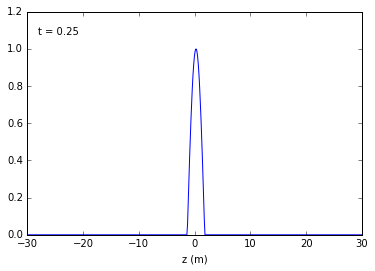

In [10]:
# Create a function to plot a forward propagating pulse. Use interact() to make it interactive.

zmin = -30
zmax = 30
numpnts = 500
def plotpulse(u,t=0):
    x = np.linspace(zmin,zmax,numpnts)
    y = np.zeros(numpnts)
    for i in range(0,numpnts): 
        y[i] = pulse(x[i] - u*t)
    plt.plot(x,y)
    plt.ylim(0,1.2)
    plt.xlabel('z (m)')
    plt.figtext(0.15,0.82,'t = ' + str(t))
interact(plotpulse, u=fixed(1.0), t=(0,30,0.25));

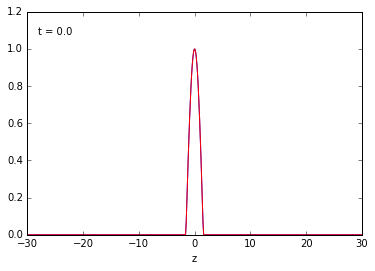

In [9]:
# Create a function to plot both forward and backward propagating pulses, 
# arbitrarily starting them at z=0.

zmin = -30
zmax = 30
numpnts = 500
def plotpulses(u,t=0):
    x = np.linspace(zmin,zmax,numpnts)
    yforward = np.zeros(numpnts)
    ybackward = np.zeros(numpnts)
    for i in range(0,numpnts): 
        yforward[i] = pulse(x[i] - u*t)
        ybackward[i] = pulse(x[i] + u*t)
    plt.plot(x,yforward, 'b')
    plt.plot(x,ybackward, 'r')
    plt.ylim(0,1.2)
    plt.xlabel('z (m)')
    plt.figtext(0.15,0.82,'t = ' + str(t))
interact(plotpulses, u=fixed(1.0), t=(0,30,0.25));

In [5]:
plt.get_backend()

'module://IPython.kernel.zmq.pylab.backend_inline'